<center>

   
## Визуализация с помощью Seaborn

## 1. Подграфики или Subplots.

Прежде чем мы коснемся библиотеки `seaborn` нужно остановиться на моменте когда нам требуется **несколько графиков** на одной картинке,
или возможно **сравнение несколькими графиками разных разрезов информации**.<br>
Именно для этого и нужны **подграфики** или как их называют по-нормальному **subplots**

Давайте как и всегда, сначала импортируем библиотеки.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Прочитаем данные.

In [2]:
reviews = pd.read_csv('../data/winemag-data_first150k.csv.gz',compression='gzip' )

Собственно создание подграфиков это мощный инструмент для сотрисовки нескольких графиков в одном объекте. Чтобы создать подграфик нужно использовать метод `.subplots()`  из библиотеки `matplotlib` и передать еху 2 агрумента - количество рядов и столбцов.<br>
Соответственно давайте создадим новый объект с 2 графиками друг под другом. Для этого нужно передать методу `.subplots()` значения 2 и 1.<br>
Также тут можем указать размер для нашего объекта фигуры (сначала задается ширина, потом высота).

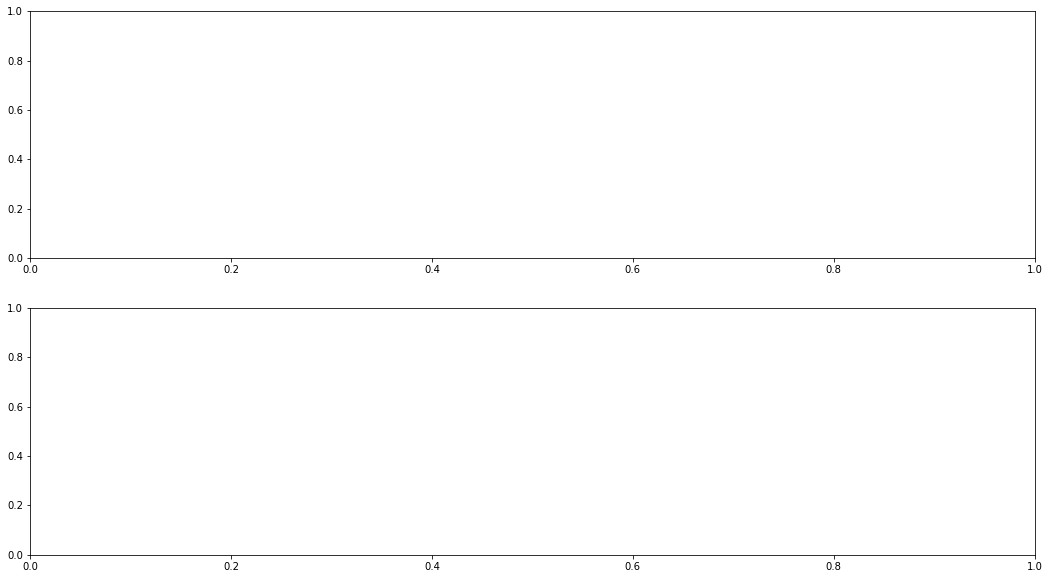

In [15]:
fig, axes = plt.subplots(2, 1, figsize=(18, 10))

Давайте немного углубимся и поймем что же происходит закулисами , когда мы строим график, например столбчатую диаграмму (bar chart/ bar plot). 

- `matplotlib` генерирует новый объект фигуры `figure`; 
- `matplotlib` генерирует новый объект осей `AxesSubplot` и присваевает его `figure`;
- и далее `AxesSubplot` используем внутренние методы, чтобы нарисовать графики.
- Отображает результат для нас.

<center>
<img src="https://i.stack.imgur.com/HZWkV.png"/> 

Метод подграфиков `.subplots()` возвращает 2 объекта - `figure`(объект фигуры) и `AxesSubplot` (объект осей), которые мы можем присвоить в 2 переменные fig, axes.
А вот что у нас лежит в axes:

In [18]:
type(fig)

matplotlib.figure.Figure

In [16]:
axes

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

Все что осталось сделать это в методе графика указать в каком подграфике нужно его отрисовать, передав нужную индексацию аттрибуту `ax` вот так: 

<AxesSubplot:>

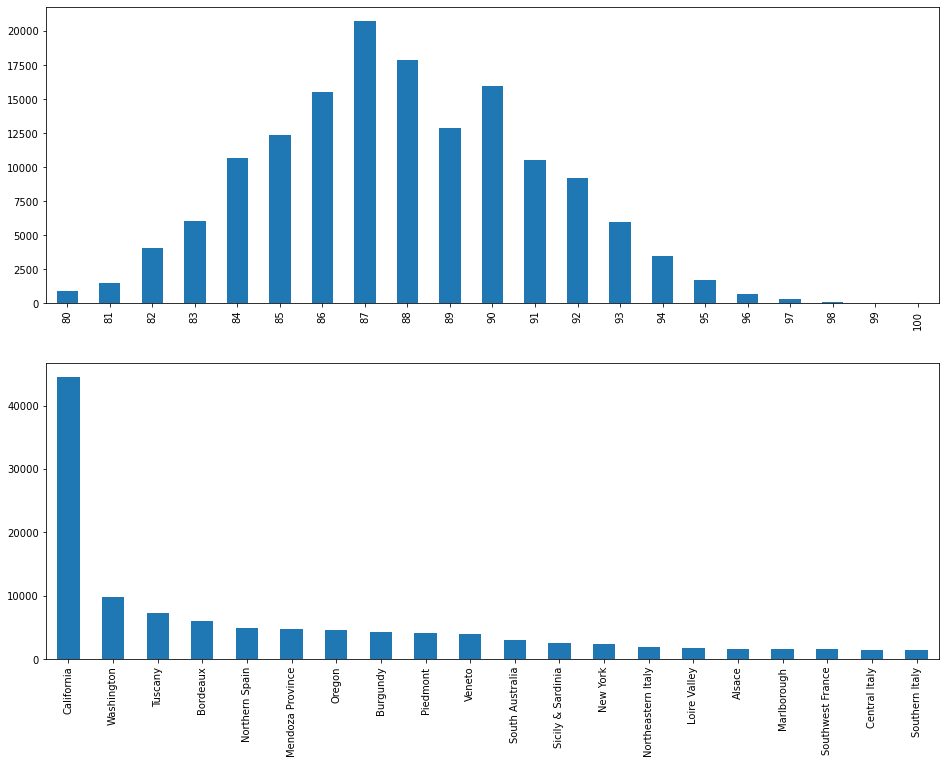

In [25]:
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

reviews['points'].value_counts().sort_index().plot.bar(
    ax=axes[0]
)

reviews['province'].value_counts().head(20).plot.bar(
    ax=axes[1]
)

Мы можем увеличить поличество столбцов или строк в зависимости от наших преференций.

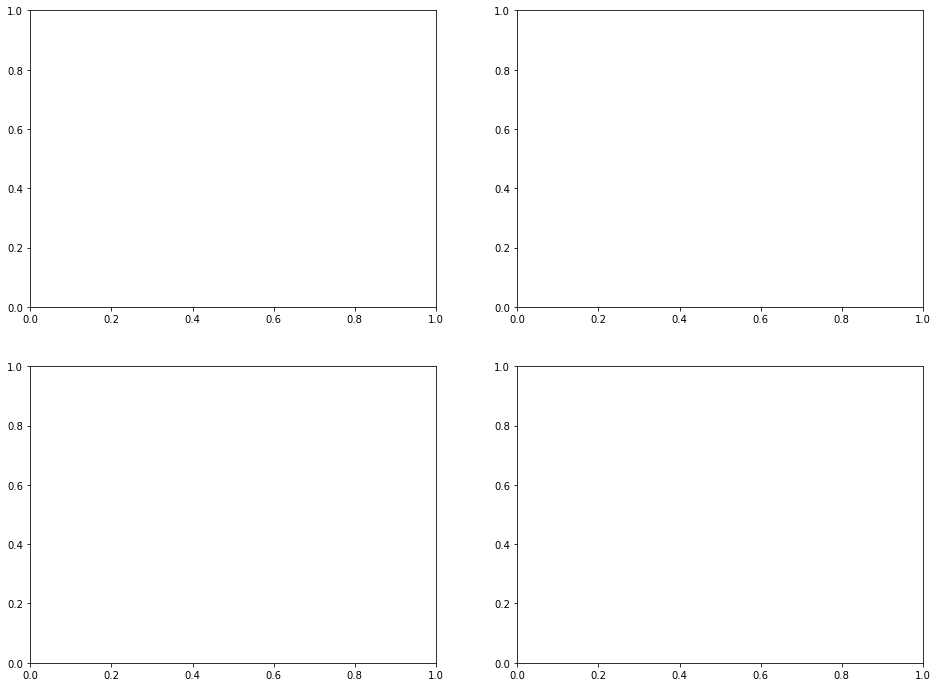

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

Так как у нас теперь несколько столбцов, то наш массив осей становится длиннее и становится листом листов.

In [29]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

И теперь нам нужно более явно указывать индексацию, куда мы хотим положить наш график. <br>
Правила индексации: как и везде в питоне сначала указывается строка, потом столбец.

<AxesSubplot:>

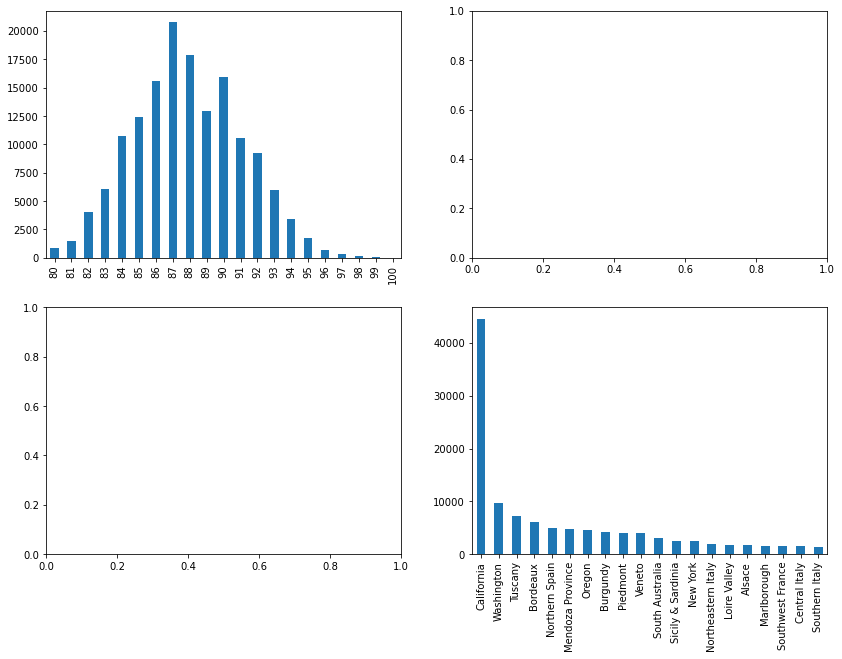

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

reviews['points'].value_counts().sort_index().plot.bar(
    ax=axes[0][0]
)

reviews['province'].value_counts().head(20).plot.bar(
    ax=axes[1][1]
)

Ну и наконец, мы можем положить в наши подграфики различную аналитику по нашим данным в разных разрезах. <br>
Также используя аналогичную индексацию можно задать названия для наших подграфиков и размер шрифта через метод `.set_title()`

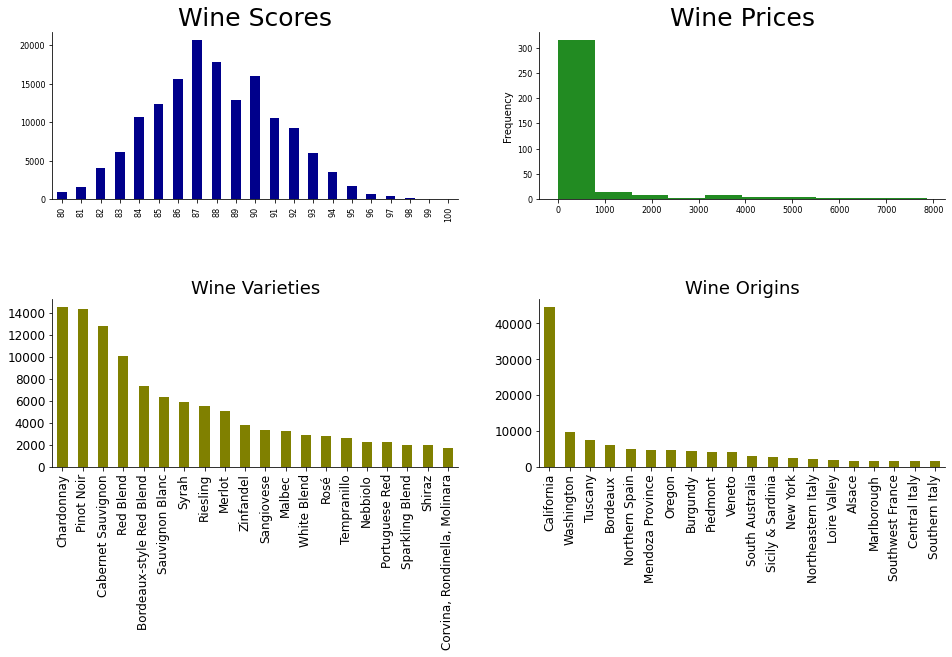

In [44]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

    
reviews['points'].value_counts().sort_index().plot.bar(
    ax=axes[0][0], fontsize=8, color='darkblue'
)
axes[0][0].set_title("Wine Scores", fontsize=25)

reviews['price'].value_counts().plot.hist(
    ax=axes[0][1], fontsize=8, color='forestgreen'
)
axes[0][1].set_title("Wine Prices", fontsize=25)


reviews['variety'].value_counts().head(20).plot.bar(
    ax=axes[1][0], fontsize=12, color='olive'
)
axes[1][0].set_title("Wine Varieties", fontsize=18)

reviews['province'].value_counts().head(20).plot.bar(
    ax=axes[1][1], fontsize=12, color='olive'
)
axes[1][1].set_title("Wine Origins", fontsize=18)

    
plt.subplots_adjust(hspace=.6)

import seaborn as sns
sns.despine()

[Тут](https://matplotlib.org/examples/color/named_colors.html) можно найти много наименований цветов и использовать их при дальнейшей работой с графиками.

Так собственно почему построение подграфиков это удобно?

Во-первых, работа налитика довольно часто связана с проверками гипотез на разных данных или выборках. Соответственно можно написать некую функцию с графиком, которая строила бы все необходимые графические представления и вызывать ее по мере надобности. Больше не нужно писать все заново для если данные у нас в другом файле экселя или что-то подобное.

Во-вторых построение множественных графиков по нескольким признакам дает целостность информации о массиве данных, который перед нами.

Ну, и в-третьих, это выглядит более профессионально, чем одинокие графики. А если это часто запрашиваемый отчет/график, то можно его улучшить вплоть до создания интерактивного дашборда, о которых мы поговорим ближе к концу курса.

А теперь пора перейти к `seaborn`.

## 2. Seaborn

Итак, мы прошлись по основам `matplotlib`, познакомились с подграфиками или `subplots`, а теперь познакомимся `seaborn` — это по сути более высокоуровневое API на базе библиотеки matplotlib. Также в Seaborn зашиты более удобные методы для оформления и набор более сложных графиков, которые потребовали бы в `matplotlib` довольно сложной реализации.  

Теперь к тому что мы импортируем каждый раз добавляется еще и `import seaborn as sns`.<br>
Также добавим некоторые настройки для наших графиков, а именно более четкое форматирование и немного увеличим размер графика.

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# более четкое форматирование
%config InlineBackend.figure_format = 'svg' 

# размер графика
from pylab import rcParams
rcParams['figure.figsize'] = 6, 4

Рассмотрим несколько примеров графиков в `seaborn`, как их можно построить и когда они могут пригодиться.

<table>
<tr>
<td><img src="https://i.imgur.com/3cYy56H.png" width="350px"/></td>
<td><img src="https://i.imgur.com/V9jAreo.png" width="350px"/></td>
<td><img src="https://i.imgur.com/5a6dwtm.png" width="350px"/></td>
<td><img src="https://i.imgur.com/ZSsHzrA.png" width="350px"/></td>
</tr>
<tr>
<td style="font-weight:bold; font-size:16px;">Count (Bar) Plot</td>
<td style="font-weight:bold; font-size:16px;">KDE Plot</td>
<td style="font-weight:bold; font-size:16px;">Joint (Hex) Plot</td>
<td style="font-weight:bold; font-size:16px;">Violin Plot</td>
</tr>
<tr>
<td>sns.countplot()</td>
<td>sns.kdeplot()</td>
<td>sns.jointplot()</td>
<td>sns.violinplot()</td>
</tr>
<tr>
<td>Хорошо подходит для номинативных/ порядковых данных небольшого размера. </td>
<td>Хорошо подходит для числовых данных (неприрывные величины).</td>
<td>Хорошо подходит для числовых и номинативных данных.</td>
<td>числовых данных для числовых и номинативных данных.</td>
</tr>
</table>

### Count (Bar) Plot

Уже знакомая нам столбчатая диаграмма в `seaborn` называется `countplot` и чтобы построить его нужно всего лишь передать объект `pandas.Series` как параметр. <br>
Дополнительно можно, например, передать параметр цветовой палитры в которой будет выполнен график. Список и примеры палитр можно найти также [тут](https://seaborn.pydata.org/tutorial/color_palettes.html).

Стоит отметить, что в `seaborn` нам не нужно агрегировать данные и считать частоты с помощью `value_counts`как мы делали ранее в `matplotlib` - здесь все гораздо проще, библиотека сама все сделает за нас.

C:\Users\AG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='points', ylabel='count'>

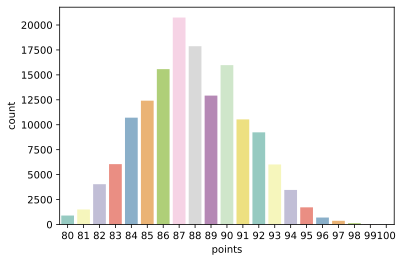

In [48]:
sns.countplot(reviews['points'], palette="Set3")

### KDE plot

В `seaborn` есть [линейный график](https://seaborn.pydata.org/examples/errorband_lineplots.html), но только для многослойной визуализации, когда мы сопоставляем 2 переменные. Однако есть интересный KDE plot, который повторяет функциональность линейного графика для одномерного случая. 

<AxesSubplot:xlabel='price', ylabel='points'>

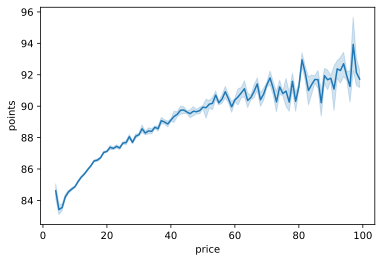

In [49]:
sns.lineplot(x='price', y='points',data = reviews[reviews.price <100])

[KDE](https://ru.wikipedia.org/wiki/%D0%AF%D0%B4%D0%B5%D1%80%D0%BD%D0%B0%D1%8F_%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BF%D0%BB%D0%BE%D1%82%D0%BD%D0%BE%D1%81%D1%82%D0%B8) это сокращение от "ядерная оценка плотности" и является методом сглаживания данных и еще иногда называется методом окна Парзена-Розенблатта. Метод полезен в случае если у нас много экстримальных значений/выбросов, наприме когда мы считаем частоты по цене вина:<br>
...<br>
19 долларов - 1 шт такого вина<br>
20 долларов - 300 шт<br>
100 долларов - 2 шт <br>
...<br>
Таким образом у нас будут вызывать сильные колебания, как например ниже на графике. А наш метод KDE помогает сгладить и убрать такие скачки.

<AxesSubplot:>

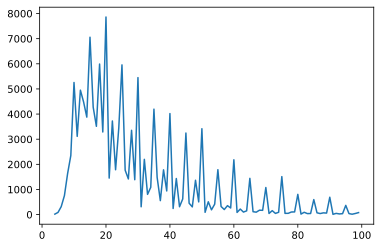

In [50]:
reviews[reviews['price'] < 100]['price'].value_counts().sort_index().plot.line()

<AxesSubplot:xlabel='price', ylabel='Density'>

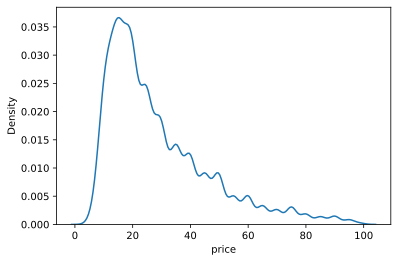

In [15]:
sns.kdeplot(reviews.query('price < 100').price)

Таким образом мы получаем гладкую линию, которая показывает распределение цен на разные вина.<br>

Вообще, честно говоря, для отображение линейных данных с нестабильной природой лучше всегда использовать `.kdeplot()`.

### Distplot

Похожим на гистограмму в `seaborn` графиком является distplot, который совмещает в себе и гистограмму и сглаживание через KDE. <br> 
Как и в гистограмме `matplotlib` можно настраивать количесво бинов/бакетов/диапазонах которые показывают количество наблюдений в диапазоне определенных значений измеряемой переменной.

<AxesSubplot:xlabel='points'>

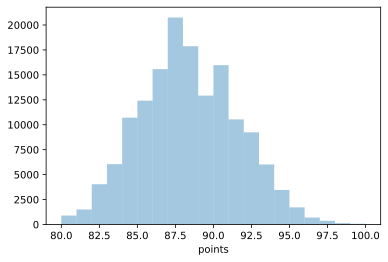

In [54]:
sns.distplot(reviews['points'], bins=20, kde=False)

C:\Users\AG\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price'>

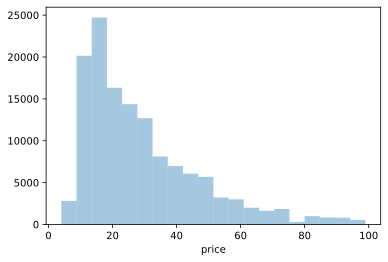

In [59]:
prices_available = reviews[(~reviews['price'].isna())&(reviews['price']<100)]
sns.distplot(prices_available['price'], bins=20, kde=False)

### Hex plot

Для того чтобы подробнее посмотреть на взаимосвязь двух численных признаков можно использовать гибрид диаграммы рассеивания и гистограммы -  `joint_plot`.

Так как это довольно сложная визуализация, то нам придется переключиться на более легковесный формат для нашего объекта.
Сделаем полны график, а потом граничимся ценой в 100 долларов и сделаем выборку в 500 наблюдений.

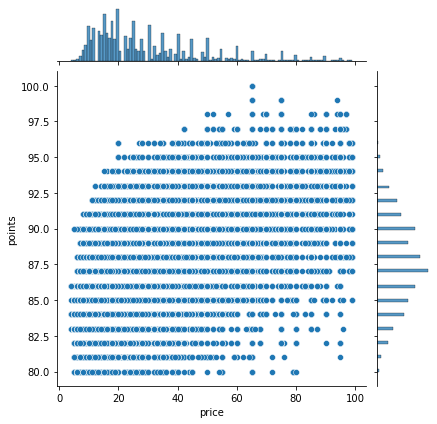

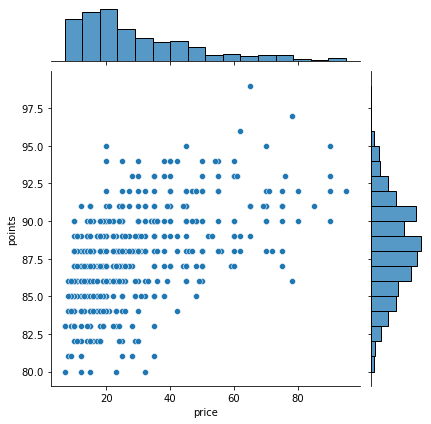

In [18]:
%config InlineBackend.figure_format = 'png' 
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100])
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100].sample(500))

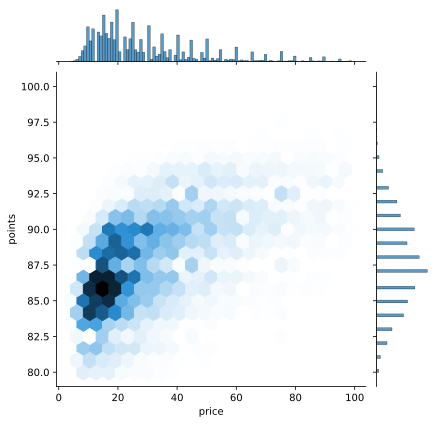

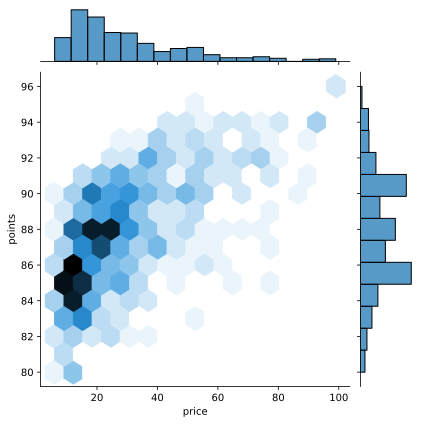

In [65]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100], kind='hex', 
              gridsize=22)

sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100].sample(500), kind='hex', 
              gridsize=15)

Прекрасной альтернативой для гексагона и диаграмм рассеивания является уже знакомый нам KDE, который может нарисовать плотность распределения соотнеся 2 количественные величины на плоскости и действительн опоказать насыщенност, там где наблюдений много.

In [23]:
#sns.kdeplot(reviews[reviews['price'] < 100].loc[:, ['price', 'points']].dropna().sample(5000),shade=True)

### Box plot и Violin plot

`Box plot` дословно график-коробка и, вобщем то, он и состоит из коробки, а также усиков и точек. **Коробка** показывает интерквантильный размах распределения, то есть соответственно 25% (Q1) и 75% (Q3) процентили. Черта внутри коробки обозначает медиану распределения. **Усы** отображают весь разброс точек кроме выбросов, то есть минимальные и максимальные значения, которые попадают в промежуток (Q1 - 1.5*IQR, Q3 + 1.5*IQR), где IQR = Q3 - Q1 - интерквантильный размах. **Точки** на графике это выбросы- те значения, которые не вписываются в промежуток значений, заданный усами графика.

In [72]:
# отфильтровали наблюдения по топ-5 винам
df = reviews[reviews.variety.isin(reviews.variety.value_counts().head(6).index)]

df.points.describe()

count    65302.000000
mean        88.179152
std          3.353136
min         80.000000
25%         86.000000
50%         88.000000
75%         91.000000
max        100.000000
Name: points, dtype: float64

<AxesSubplot:xlabel='variety', ylabel='points'>

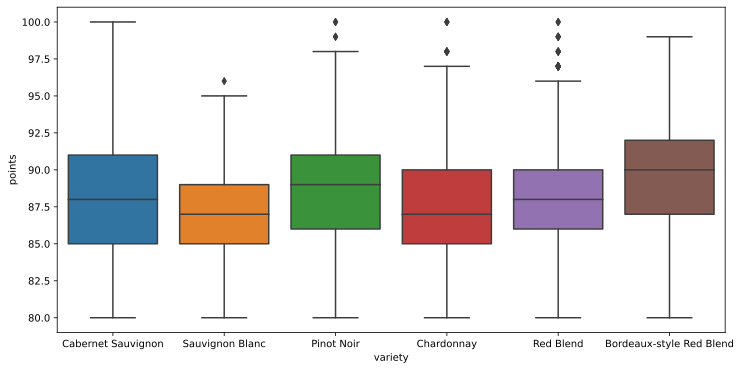

In [73]:
# строим boxplot
fig, ax = plt.subplots(figsize=(12,6))  
sns.boxplot(
    x='variety',
    y='points',
    data=df
)

`Violin plot` же это график-виолончель или скрипка. Он еще более продвинутый чем `Box plot` и показывает не только центральную статистику по категории, но и плотность распределения наблюдений по всему нашему распредедению.

<AxesSubplot:xlabel='variety', ylabel='points'>

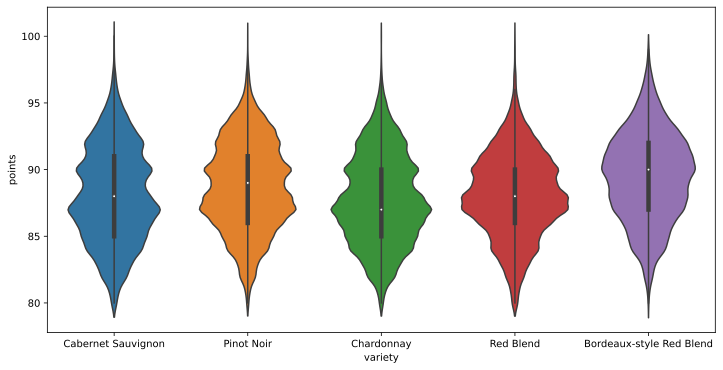

In [74]:
fig, ax = plt.subplots(figsize=(12,6))  
sns.violinplot(
    x='variety',
    y='points',
    data=reviews[reviews.variety.isin(reviews.variety.value_counts()[:5].index)]
)

### Heatmap

И еще один тип графиков (последний из тех, которые мы рассмотрим) - это тепловая карта или `heatmap`. Тепловая карта позволяет посмотреть на распределение какого-то численного признака по двум категориальным. В нашем случае мы посмотрим по уже сагрегированной в прошлом уроке табличке, количество упоминаний в разрезе баллов по топ-5 винам из нашего датасета.

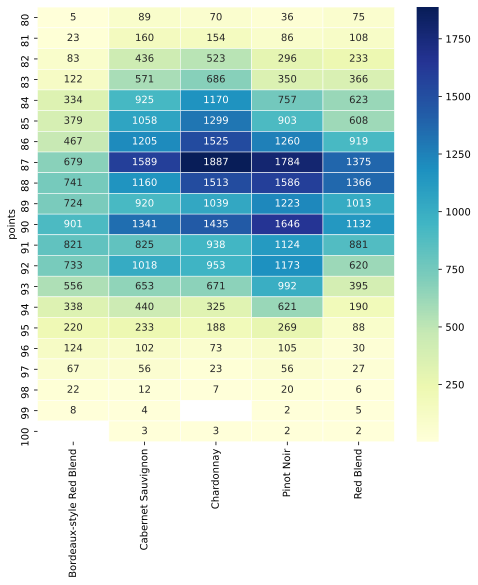

In [75]:
wine_counts = pd.read_csv("../data//wine_score_counts_5.csv",index_col=0)
fig, ax = plt.subplots(figsize=(8,8))  
sns.heatmap(wine_counts, annot=True, fmt=".0f", linewidths=.5, cmap="YlGnBu", ax=ax);

Как мы увидели `Seaborn` это мощный инструмент для визуализации и он имеет огромное количество возможностей для кастомизации, чтобы сделать график/графики именно такими как вы хотите чтоб они были. Для того чтобы рассмотреть все методы и приемы не хватит и недели, поэтому очень важно **пользоваться поиском** и **смотреть на примеры визуализаций** в [галереи](https://seaborn.pydata.org/examples/index.html) `seaborn`. <br>
